In [4]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Python

In [2]:
class Paths:
    model_xgb = '../models/xgb.pickle'
    model_cb  = '../models/cb.pickle'
    model_lgb = '../models/lgb.pickle'
    
paths = Paths()

paths.model_xgb  # вместо paths['model_xgb'] при работе со словарем

'../models/xgb.pickle'

# Pandas tasks

In [203]:
url = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/driver_info.csv' 
drivers = pd.read_csv(url)  # driver_info - информация про водителей
drivers.head()

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
0,27,9.0,865,19.0,l17437965W,1,2019-4-2
1,46,7.9,2116,11.0,Z12362316j,0,2021-11-19
2,59,7.8,947,4.0,g11098715c,0,2021-1-15
3,37,7.0,18,4.0,U12618125q,0,2019-11-20
4,39,8.2,428,7.0,A14375829B,0,2019-7-23


In [204]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15153 entries, 0 to 15152
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 15153 non-null  int64  
 1   user_rating         15153 non-null  float64
 2   user_rides          15153 non-null  int64  
 3   user_time_accident  14196 non-null  float64
 4   user_id             15153 non-null  object 
 5   sex                 15153 non-null  int64  
 6   first_ride_date     15153 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 828.8+ KB


In [211]:
drivers.describe()

,age,user_rating,user_rides,user_time_accident,sex
count,15153.000000,15153.000000,15153.000000,14196.000000,15153.000000
mean,33.581073,8.109345,871.015442,10.132854,0.499967
std,9.919271,0.668246,573.512378,8.791537,0.500016
min,18.000000,5.800000,0.000000,0.000000,0.000000
25%,25.000000,7.700000,421.000000,4.000000,0.000000
50%,33.000000,8.100000,876.000000,9.000000,0.000000
75%,41.000000,8.600000,1145.000000,14.000000,1.000000
max,63.000000,10.000000,3316.000000,84.000000,1.000000


In [210]:
# age 33.581073
# drivers['age'].median() 33.0
# user_rating 5.800000
# drivers.user_time_accident.moda()
# sex 0
# строк 15153

In [221]:
# drivers.user_time_accident.value_counts()
drivers.user_time_accident.mode()

0    6.0
Name: user_time_accident, dtype: float64

# Стратификия по регрессионному таргету.

<AxesSubplot: >

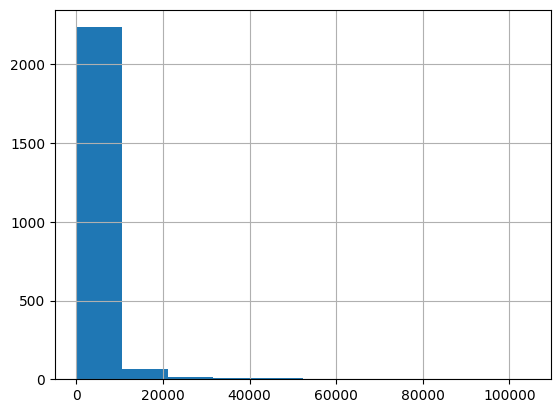

In [9]:
df = pd.read_csv('../data/car_train.csv')
df['target_reg'].hist()

In [168]:
# train['target_reg'].q()
N = 10
df['target_reg_group'] = pd.qcut(df['target_reg'], N, labels = [f'group_{i}' for i in range(N)])

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=N, shuffle = True)
y = df['target_reg_group']
df['num_fold'] = None

for i, (train_index, test_index) in enumerate(skf.split(df, df['target_reg_group'])):
    df.loc[test_index, 'num_fold'] = i
    
    
std = df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')['target_reg'].std()
print(df['target_reg'].mean() - std, df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')['target_reg'].mean(), df['target_reg'].mean() + std)

df[['car_id', 'target_reg', 'num_fold']].to_csv('../do_not_commit_this/stratified_valid_solv.csv', index=False)
df['num_fold'] = None
df[['car_id', 'target_reg', 'num_fold']].to_csv('../do_not_commit_this/stratified_valid.csv', index=False)
df[['car_id', 'target_reg', 'num_fold']].sample(5)


threshold = 350
result = df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')['target_reg'].std()
answer = threshold - result
answer

3530.852923347054 3824.9531980484944 4118.348565741521


nan

In [169]:
df['num_fold'].isnull().sum()

In [194]:
_params_ = {'data' : 'rides_info',
          'kind' : 'scatter',
          'x' : 'ride_date',
          'y' : 'user_time_accident',
          'row' : 'fuel_type',
          'size' : 'car_type',
          'aspect' : 4, 
          'alpha' : 0.5, 
          'hue' : 'target_class'}

params = {'data' : 'rides_info',
          'kind' : 'scatter',
          'x' : 'ride_date',
          'y' : 'user_time_accident',
          'row' : 'fuel_type',
          'size' : 'car_type',
          'aspect' : 4, 
          'alpha' : 0.5, 
          'hue' : 'target_class'}

# print(_params_.keys() == params.keys())
# set(_params_.values()) == set(params.values())
print(_params_.keys() == params.keys() and set(_params_.values()) == set(params.values()))


True


In [186]:
set(_correct_params_.values()) == set(params.values())

False

In [180]:
_correct_params_.viewkeys() == params.viewkeys()
set(d_1.keys()).symmetric_difference(set(d_2.keys()))

set()

In [144]:
df['target_reg'].std()

6171.887271560219

In [106]:
!ls ../do_not_commit_this/

'2.3 - Visualisation_task.ipynb'   make_soft_blend.csv	   soft_blend_sol.csv
 blend_baseline.csv		   sample_submission.csv


In [113]:
# df.groupby('target_class', as_index=False)['target_reg'].agg('mean').plot.bar()

In [117]:
print(df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')['target_reg'].std())

249.63794356005386


In [122]:
df.groupby('num_fold', as_index=False)['target_reg'].agg('mean').plot.bar()

(3451.680842232564, 3824.489087542644, 4197.520646856011)

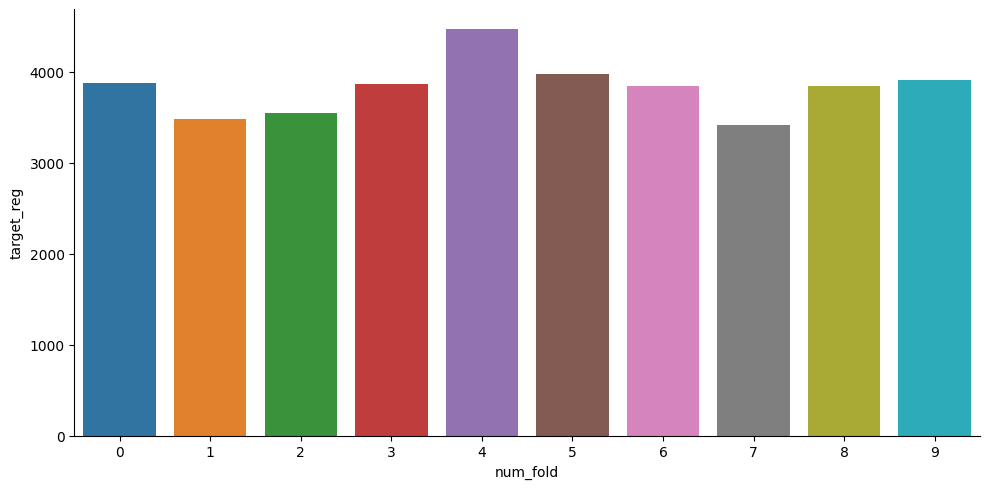

In [143]:
import seaborn as sns

tmp = df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')
sns.catplot(data = tmp, x = 'num_fold', y = 'target_reg', aspect=2, kind="bar");

<AxesSubplot: >

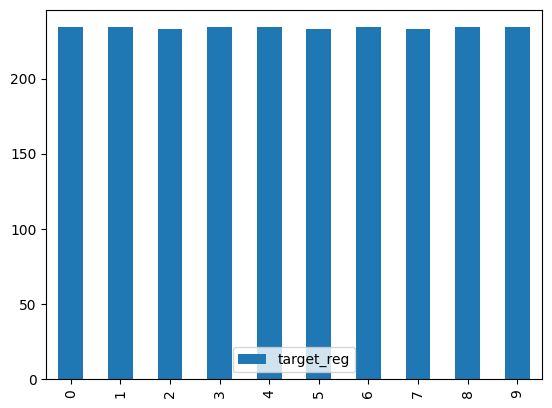

In [55]:
df.groupby('target_reg_group', as_index=False)['target_reg'].agg('count').plot.bar()

<AxesSubplot: >

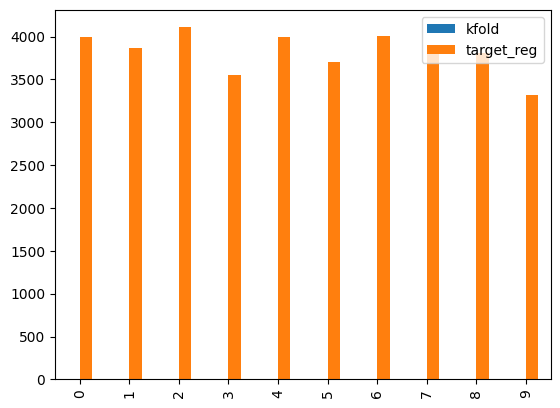

True

In [2]:
!ls ../data/

car_test.csv	      driver_info.csv	    rides_info.csv
car_train.csv	      fix_info.csv	    test_data.csv
demo_car_train.csv    fs_task1_10f.csv	    tmp_car_info.csv
demo_driver_info.csv  fs_task2_45f.csv	    tmp_driver_info.csv
demo_fix_info.csv     fs_task3_310f.csv     tmp_rides_info.csv
demo_rides_info.csv   quickstart_train.csv


# Feature Selection

In [200]:
# __answer = [1, 9, 8, 6, 2]

# # Заполните словарь answer_list

# answer_list = [1, 9, 8, 6, 2] #['x', 'x', 'x', 'x', 'x',]


# print(__answer == answer_list)

True


In [202]:
__answer = ['feature_1', 'feature_5']

# Заполните словарь answer_list (порядок фичей важен!)

answer_list = ['feature_5', 'feature_']

print(set(__answer) == set(answer_list))

False


In [2]:
# Загружаем датасет и присоединим к нему датсет с таргетом
rides_info = pd.read_csv('../data/quickstart_train.csv')
rides_info.head()

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,15634.32,another_bug,44.660920,1.214131e+07,0.1,180.855726,0.023174,174,170
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,2791.94,electro_bug,49.862069,1.803909e+07,0.0,187.862734,12.306011,174,174
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,2263.93,gear_stick,44.005747,1.588366e+07,0.1,102.382857,2.513319,174,173
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,1518.06,engine_fuel,49.344828,1.651883e+07,0.1,172.793237,-5.029476,174,170
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,825.78,engine_fuel,50.603448,1.398317e+07,0.1,203.462289,-14.260456,174,171


In [26]:
top_10 = ['user_uniq', 'speed_max', 'car_rating', 'mean_rating', 'year_to_start', 'user_ride_quality_median', 'distance_sum', 'riders', 'year_to_work', 'rating_min']
drop_cols = ['car_id', 'target_reg', 'target_class']
cat_cols = ['car_type', 'fuel_type', 'model']

# Dataset для 3.4.5 (feature selection)

In [4]:
# Добавим рандомные фичи
rng = np.random.RandomState(seed=42)

rides_info["random_num"] = rng.randn(rides_info.shape[0])

In [5]:
# закодируем категориальные фичи в one hot encoding вектора
rides_info = pd.get_dummies(rides_info, columns=cat_cols)

In [6]:
# заполним пропущенные значения медианным значением по столбцу
rides_info.fillna(rides_info.median(), inplace=True)

In [7]:
rides_info["random_cat"] = rng.randint(2, size=rides_info.shape[0])

In [9]:
rides_info.head()

,car_id,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,...,model_Skoda Rapid,model_Smart Coupe,model_Smart ForFour,model_Smart ForTwo,model_Tesla Model 3,model_VW Polo,model_VW Polo VI,model_VW Tiguan,model_Volkswagen ID.4,random_cat
0,y13744087j,3.78,2015,76163,2021,15634.32,another_bug,44.660920,1.214131e+07,0.1,...,0,0,0,0,0,0,0,0,0,0
1,O41613818T,3.90,2015,78218,2021,2791.94,electro_bug,49.862069,1.803909e+07,0.0,...,0,0,0,0,0,0,1,0,0,0
2,d-2109686j,6.30,2012,23340,2017,2263.93,gear_stick,44.005747,1.588366e+07,0.1,...,0,0,0,0,0,0,0,0,0,0
3,u29695600e,4.04,2011,1263,2020,1518.06,engine_fuel,49.344828,1.651883e+07,0.1,...,0,0,0,0,0,0,0,0,0,0
4,N-8915870N,4.70,2012,26428,2017,825.78,engine_fuel,50.603448,1.398317e+07,0.1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
rides_df = rides_info.drop(columns=drop_cols)

In [11]:
rides_df.head()

,car_rating,year_to_start,riders,year_to_work,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,...,model_Skoda Rapid,model_Smart Coupe,model_Smart ForFour,model_Smart ForTwo,model_Tesla Model 3,model_VW Polo,model_VW Polo VI,model_VW Tiguan,model_Volkswagen ID.4,random_cat
0,3.78,2015,76163,2021,44.660920,1.214131e+07,0.1,180.855726,0.023174,174,...,0,0,0,0,0,0,0,0,0,0
1,3.90,2015,78218,2021,49.862069,1.803909e+07,0.0,187.862734,12.306011,174,...,0,0,0,0,0,0,1,0,0,0
2,6.30,2012,23340,2017,44.005747,1.588366e+07,0.1,102.382857,2.513319,174,...,0,0,0,0,0,0,0,0,0,0
3,4.04,2011,1263,2020,49.344828,1.651883e+07,0.1,172.793237,-5.029476,174,...,0,0,0,0,0,0,0,0,0,0
4,4.70,2012,26428,2017,50.603448,1.398317e+07,0.1,203.462289,-14.260456,174,...,0,0,0,0,0,0,0,0,0,0


In [13]:
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   car_rating                2337 non-null   float64
 1   year_to_start             2337 non-null   int64  
 2   riders                    2337 non-null   int64  
 3   year_to_work              2337 non-null   int64  
 4   mean_rating               2337 non-null   float64
 5   distance_sum              2337 non-null   float64
 6   rating_min                2337 non-null   float64
 7   speed_max                 2337 non-null   float64
 8   user_ride_quality_median  2337 non-null   float64
 9   deviation_normal_count    2337 non-null   int64  
 10  user_uniq                 2337 non-null   int64  
 11  random_num                2337 non-null   float64
 12  car_type_business         2337 non-null   uint8  
 13  car_type_economy          2337 non-null   uint8  
 14  car_type

In [14]:
X = rides_df.set_axis([f'feature_{i}' for i in range(len(rides_df.columns))], axis=1)

In [15]:
X['target_reg'] = rides_info.target_reg
X['target_class'] = rides_info.target_class

In [16]:
X.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,target_reg,target_class
0,3.78,2015,76163,2021,44.660920,1.214131e+07,0.1,180.855726,0.023174,174,...,0,0,0,0,0,0,0,0,15634.32,another_bug
1,3.90,2015,78218,2021,49.862069,1.803909e+07,0.0,187.862734,12.306011,174,...,0,0,0,0,1,0,0,0,2791.94,electro_bug
2,6.30,2012,23340,2017,44.005747,1.588366e+07,0.1,102.382857,2.513319,174,...,0,0,0,0,0,0,0,0,2263.93,gear_stick
3,4.04,2011,1263,2020,49.344828,1.651883e+07,0.1,172.793237,-5.029476,174,...,0,0,0,0,0,0,0,0,1518.06,engine_fuel
4,4.70,2012,26428,2017,50.603448,1.398317e+07,0.1,203.462289,-14.260456,174,...,0,0,0,0,0,0,0,0,825.78,engine_fuel


In [18]:
X.sample(frac=0.8).to_csv('fs_task2_45f.csv', index=False)

# Dataset для 3.4.4 (feature selection - 10фичей)

In [20]:
rides_info.fillna(rides_info.median(), inplace=True)
rides_df = rides_info[top_5]
rides_df.head()

,speed_max,mean_rating,rating_min,user_uniq,user_ride_quality_median
0,180.855726,44.660920,0.1,170,0.023174
1,187.862734,49.862069,0.0,174,12.306011
2,102.382857,44.005747,0.1,173,2.513319
3,172.793237,49.344828,0.1,170,-5.029476
4,203.462289,50.603448,0.1,171,-14.260456


In [21]:
rides_df['random_1'] = rng.randint(2009, 2020, rides_info.shape[0])
rides_df['random_2'] = rng.randint(50, 500, rides_info.shape[0])
rides_df['random_3'] = rng.randint(-20, 20, rides_info.shape[0])
rides_df['random_4'] = rng.randn(rides_info.shape[0]).round(1)
rides_df['random_5'] = rng.randn(rides_info.shape[0])
rides_df.head()

,speed_max,mean_rating,rating_min,user_uniq,user_ride_quality_median,random_1,random_2,random_3,random_4,random_5
0,180.855726,44.660920,0.1,170,0.023174,2014,253,7,0.0,0.968509
1,187.862734,49.862069,0.0,174,12.306011,2015,499,10,-1.8,0.101143
2,102.382857,44.005747,0.1,173,2.513319,2016,60,0,-1.7,1.163325
3,172.793237,49.344828,0.1,170,-5.029476,2019,408,13,1.8,0.951782
4,203.462289,50.603448,0.1,171,-14.260456,2012,403,-6,-0.9,1.457698


In [22]:
rides_df = rides_df.reindex(columns = ['random_1', top_5[0], top_5[4], 'random_4', 'random_2', 'random_5', top_5[3], 'random_3', top_5[2], top_5[1]])
rides_df.head()

,random_1,speed_max,user_ride_quality_median,random_4,random_2,random_5,user_uniq,random_3,rating_min,mean_rating
0,2014,180.855726,0.023174,0.0,253,0.968509,170,7,0.1,44.660920
1,2015,187.862734,12.306011,-1.8,499,0.101143,174,10,0.0,49.862069
2,2016,102.382857,2.513319,-1.7,60,1.163325,173,0,0.1,44.005747
3,2019,172.793237,-5.029476,1.8,408,0.951782,170,13,0.1,49.344828
4,2012,203.462289,-14.260456,-0.9,403,1.457698,171,-6,0.1,50.603448


In [24]:
X = rides_df.set_axis([f'feature_{i}' for i in range(len(rides_df.columns))], axis=1)
X['target'] = rides_info['target_class']
X.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,2014,180.855726,0.023174,0.0,253,0.968509,170,7,0.1,44.660920,another_bug
1,2015,187.862734,12.306011,-1.8,499,0.101143,174,10,0.0,49.862069,electro_bug
2,2016,102.382857,2.513319,-1.7,60,1.163325,173,0,0.1,44.005747,gear_stick
3,2019,172.793237,-5.029476,1.8,408,0.951782,170,13,0.1,49.344828,engine_fuel
4,2012,203.462289,-14.260456,-0.9,403,1.457698,171,-6,0.1,50.603448,engine_fuel


In [25]:
X.sample(frac=0.8).to_csv('fs_task1_10f.csv', index=False)

# Dataset для 3.4.6 (feature selection - 300фичей)

In [27]:
rides_info.fillna(rides_info.median(), inplace=True)
rides_df = rides_info[top_10]
display(rides_df.head())
rides_df.info()

,user_uniq,speed_max,car_rating,mean_rating,year_to_start,user_ride_quality_median,distance_sum,riders,year_to_work,rating_min
0,170,180.855726,3.78,44.660920,2015,0.023174,1.214131e+07,76163,2021,0.1
1,174,187.862734,3.90,49.862069,2015,12.306011,1.803909e+07,78218,2021,0.0
2,173,102.382857,6.30,44.005747,2012,2.513319,1.588366e+07,23340,2017,0.1
3,170,172.793237,4.04,49.344828,2011,-5.029476,1.651883e+07,1263,2020,0.1
4,171,203.462289,4.70,50.603448,2012,-14.260456,1.398317e+07,26428,2017,0.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_uniq                 2337 non-null   int64  
 1   speed_max                 2337 non-null   float64
 2   car_rating                2337 non-null   float64
 3   mean_rating               2337 non-null   float64
 4   year_to_start             2337 non-null   int64  
 5   user_ride_quality_median  2337 non-null   float64
 6   distance_sum              2337 non-null   float64
 7   riders                    2337 non-null   int64  
 8   year_to_work              2337 non-null   int64  
 9   rating_min                2337 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 182.7 KB


In [28]:
for i in range(300):
    if i % 3 == 0:
        rides_df[f'random_{i}'] = rng.randint(i * 10, 50000, rides_info.shape[0])
    elif i % 100 == 0:
        rides_df[f'random_{i}'] = rng.randn(rides_info.shape[0])
    elif i % 107 == 0:
        rides_df[f'random_{i}'] = rng.randint(2011, 2022, rides_info.shape[0])
    else:
        rides_df[f'random_{i}'] = rng.randn(rides_info.shape[0]).round(i % 2 + 2)
display(rides_df.head())
rides_df.info()

,user_uniq,speed_max,car_rating,mean_rating,year_to_start,user_ride_quality_median,distance_sum,riders,year_to_work,rating_min,...,random_290,random_291,random_292,random_293,random_294,random_295,random_296,random_297,random_298,random_299
0,170,180.855726,3.78,44.660920,2015,0.023174,1.214131e+07,76163,2021,0.1,...,0.31,9042,1.34,1.318,8746,-0.830,0.53,26888,0.78,-2.391
1,174,187.862734,3.90,49.862069,2015,12.306011,1.803909e+07,78218,2021,0.0,...,-0.90,35280,0.24,0.437,32366,0.696,-1.57,31952,-0.92,-0.191
2,173,102.382857,6.30,44.005747,2012,2.513319,1.588366e+07,23340,2017,0.1,...,-1.64,44327,0.30,-0.577,44756,0.102,1.29,11801,0.60,1.018
3,170,172.793237,4.04,49.344828,2011,-5.029476,1.651883e+07,1263,2020,0.1,...,0.37,3912,2.36,-0.232,22596,0.695,0.89,31380,1.09,-0.411
4,171,203.462289,4.70,50.603448,2012,-14.260456,1.398317e+07,26428,2017,0.1,...,0.61,39559,0.81,0.986,17964,-1.139,1.23,6409,0.73,-1.738


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Columns: 310 entries, user_uniq to random_299
dtypes: float64(204), int64(106)
memory usage: 5.5 MB


In [29]:
rides_df = rides_df.reindex(columns = np.random.permutation(rides_df.columns.to_list()))
display(rides_df.head())
rides_df.info()

,random_61,random_103,random_140,random_175,random_275,random_27,random_74,random_171,random_64,random_232,...,random_142,random_177,random_57,random_8,random_292,random_244,random_225,random_101,random_68,user_uniq
0,-0.931,1.324,-0.21,0.942,2.698,47569,1.79,22177,1.43,-0.15,...,-0.01,19337,44165,-0.51,1.34,1.90,23017,-1.108,-0.92,170
1,1.074,-1.027,-0.53,-0.519,-1.341,42592,0.16,27582,0.15,0.65,...,-0.87,23016,42662,-1.15,0.24,0.84,19920,0.323,-0.05,174
2,-0.754,0.499,-1.26,-0.535,1.057,3338,1.97,22746,0.29,-1.01,...,-0.03,24091,36938,-1.72,0.30,0.46,14062,-1.168,-0.55,173
3,-0.503,-0.389,0.14,2.460,-0.360,40267,0.12,22362,0.98,0.73,...,0.74,7282,47510,0.95,2.36,-0.22,8041,-0.725,1.39,170
4,-1.401,0.423,-0.79,0.230,-2.099,22735,-0.30,46548,-0.83,2.48,...,0.43,4461,28508,-0.61,0.81,-0.55,12611,1.790,-0.22,171


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Columns: 310 entries, random_61 to user_uniq
dtypes: float64(204), int64(106)
memory usage: 5.5 MB


In [30]:
print (*[(i, name) for (i, name) in enumerate(rides_df.columns) if 'random' not in name])

(59, 'rating_min') (108, 'year_to_start') (127, 'user_ride_quality_median') (132, 'riders') (141, 'speed_max') (203, 'distance_sum') (234, 'mean_rating') (246, 'year_to_work') (274, 'car_rating') (309, 'user_uniq')


In [31]:
X = rides_df.set_axis([f'feature_{i}' for i in range(len(rides_df.columns))], axis=1)
X['target'] = rides_info['target_class']
X.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,target
0,-0.931,1.324,-0.21,0.942,2.698,47569,1.79,22177,1.43,-0.15,...,19337,44165,-0.51,1.34,1.90,23017,-1.108,-0.92,170,another_bug
1,1.074,-1.027,-0.53,-0.519,-1.341,42592,0.16,27582,0.15,0.65,...,23016,42662,-1.15,0.24,0.84,19920,0.323,-0.05,174,electro_bug
2,-0.754,0.499,-1.26,-0.535,1.057,3338,1.97,22746,0.29,-1.01,...,24091,36938,-1.72,0.30,0.46,14062,-1.168,-0.55,173,gear_stick
3,-0.503,-0.389,0.14,2.460,-0.360,40267,0.12,22362,0.98,0.73,...,7282,47510,0.95,2.36,-0.22,8041,-0.725,1.39,170,engine_fuel
4,-1.401,0.423,-0.79,0.230,-2.099,22735,-0.30,46548,-0.83,2.48,...,4461,28508,-0.61,0.81,-0.55,12611,1.790,-0.22,171,engine_fuel


In [32]:
X.sample(frac=0.7).to_csv('fs_task3_310f.csv', index=False)